In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
path1= ('ForageAccentureProject/Content.csv')
path2= ('ForageAccentureProject/ReactionTypes.csv')
path3= ('ForageAccentureProject/Reactions.csv')

# Read the CSV files into pandas DataFrames
contents_df = pd.read_csv(path1)
reactions_type_df = pd.read_csv(path2)
reactions_df = pd.read_csv(path3)

In [ ]:
contents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
# Drop columns that are not needed
columns_to_drop1 = ['Unnamed: 0', 'URL', 'User ID']
contents_df.drop(columns_to_drop1, axis=1, inplace=True)

In [ ]:
contents_df.rename(columns={'Type': 'ContentType'}, inplace=True)

In [ ]:
# Convert all categories to lowercase
contents_df['Category'] = contents_df['Category'].str.lower()

In [ ]:
contents_df['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture',
       '"culture"', '"studying"', '"animals"', '"soccer"', '"dogs"',
       '"tennis"', '"food"', '"technology"', '"cooking"',
       '"public speaking"', '"veganism"', '"science"'], dtype=object)

In [ ]:
contents_df['Category'] = contents_df['Category'].str.replace('"', '')

In [ ]:
contents_df['Category'].nunique()

16

In [ ]:
contents_df.isnull().sum()

Content ID     0
ContentType    0
Category       0
dtype: int64

In [ ]:
contents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Content ID   1000 non-null   object
 1   ContentType  1000 non-null   object
 2   Category     1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [ ]:
reactions_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [ ]:
columns_to_drop2 = ['Unnamed: 0']
reactions_type_df.drop(columns_to_drop2, axis=1, inplace=True)

In [ ]:
reactions_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [ ]:
reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [ ]:
columns_to_drop3 = ['Unnamed: 0', 'User ID']
reactions_df.drop(columns_to_drop3, axis=1, inplace=True)

In [ ]:
reactions_df.isnull().sum()

Content ID      0
Type          980
Datetime        0
dtype: int64

In [ ]:
reactions_df.dropna(inplace=True)

In [ ]:
reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  24573 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    24573 non-null  object
dtypes: object(3)
memory usage: 767.9+ KB


In [ ]:
#Merge the Reactions and Content dataset based on the Content ID
merged_df = reactions_df.merge(contents_df, on='Content ID', how='left')

In [ ]:
# Merge the merged DataFrame with ReactionsType dataframe
final_df = merged_df.merge(reactions_type_df, on='Type', how='left')

In [ ]:
final_df.head()

,Content ID,Type,Datetime,ContentType,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30


In [ ]:
final_df.to_csv('ForageAccentureProject/FinalDataset_SocialBuzz_Analysis.csv', index=False)

In [ ]:
# Group the data by Category and calculate the sum of scores
category_scores = final_df.groupby('Category')['Score'].sum()

# Sort the categories based on the sum of scores in descending order
top_categories = category_scores.sort_values(ascending=False).head(5)

# Print the top 5 performing categories
print(top_categories)

Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64


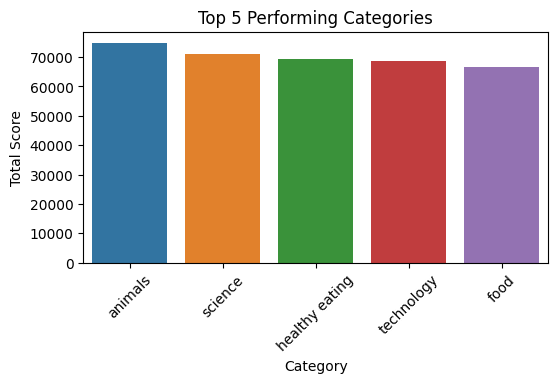

In [ ]:
# Group the data by Category and calculate the sum of scores
category_scores = final_df.groupby('Category')['Score'].sum()

# Sort the categories based on the sum of scores in descending order
top_categories = category_scores.sort_values(ascending=False).head(5)

# Create a bar plot to visualize the top performing categories
plt.figure(figsize=(6, 3))  # Adjust the figure size if needed
sns.barplot(x=top_categories.index, y=top_categories.values)

# Add labels and title to the plot
plt.xlabel("Category")
plt.ylabel("Total Score")
plt.title("Top 5 Performing Categories")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

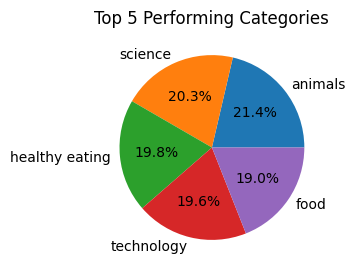

In [ ]:
# Create a pie chart to visualize the top performing categories
plt.figure(figsize=(6, 3))  # Adjust the figure size if needed
plt.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%')

# Set the title for the chart
plt.title("Top 5 Performing Categories")

# Display the chart
plt.show()

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Content ID   24573 non-null  object
 1   Type         24573 non-null  object
 2   Datetime     24573 non-null  object
 3   ContentType  24573 non-null  object
 4   Category     24573 non-null  object
 5   Sentiment    24573 non-null  object
 6   Score        24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


Key Insights

In [ ]:
# Find the number of unique categories
unique_categories = final_df['Category'].nunique()

# Print the result
print("Number of unique categories:", unique_categories)

Number of unique categories: 16


In [ ]:
#How many reactions are there to the most popular category?
# Filter the data for the "animal" category
animal_category = final_df[final_df['Category'] == 'animals']

# Calculate the value counts of each type within the "animal" category
type_counts = animal_category['Type'].value_counts()

# Print the result
print("Number of each type within the 'animal' category:")
print(type_counts)

Number of each type within the 'animal' category:
scared         132
peeking        129
hate           128
cherish        125
super love     123
disgust        122
want           122
worried        121
heart          120
love           119
intrigued      116
dislike        115
adore          114
interested     110
like           101
indifferent    100
Name: Type, dtype: int64


In [ ]:
# Calculate the value counts of each type within the "animal" category
total_type_counts = animal_category['Type'].count()

# Print the result
print("Number reactions for 'animal' category:")
print(total_type_counts)

Number reactions for 'animal' category:
1897


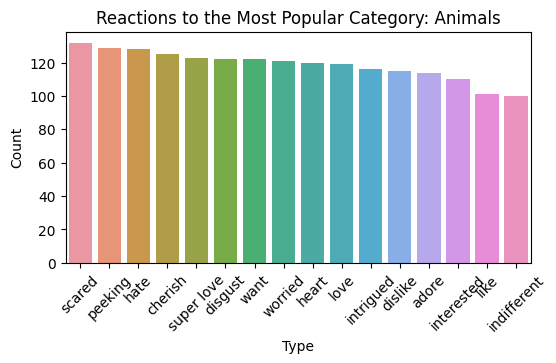

In [ ]:
# Get the most common type
most_common_type = type_counts.idxmax()

# Create a bar plot to visualize the number of reactions to the most popular category
plt.figure(figsize=(6, 3))  # Adjust the figure size if needed
sns.barplot(x=type_counts.index, y=type_counts.values)

# Add labels and title to the plot
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Reactions to the Most Popular Category: Animals")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
#Month with most posts
# Convert the "Datetime" column to datetime format
final_df['Datetime'] = pd.to_datetime(final_df['Datetime'])

# Extract the month from the "Datetime" column
final_df['Month'] = final_df['Datetime'].dt.month

# Calculate the value counts for each month
month_counts = final_df['Month'].value_counts()

# Find the month with the most posts
most_posts_month = month_counts.idxmax()

# Print the result
print("Month with the most posts:", most_posts_month)

Month with the most posts: 5


In [ ]:

# Calculate the value counts for each month
month_counts = final_df['Month'].value_counts().sort_index()

# Create a line chart to visualize the number of posts per month
fig = go.Figure(data=go.Scatter(x=month_counts.index, y=month_counts.values,
                               mode='lines+markers', marker=dict(size=8)))

# Add labels and title to the chart
fig.update_layout(xaxis_title="Month", yaxis_title="Number of Posts", title="Number of Posts per Month")

# Adjust the figure size
fig.update_layout(width=800, height=400)

# Show the chart
fig.show()